# Regresion Lineal Multiple
Alumnos: Iñaki Echeverria, Xavi Joel Juan

Dataset: California Housing (precios de casas)

## 1. Carga de Datos y Visualizacion

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Cargar dataset real de precios de casas
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
df = pd.read_csv(url)

# Eliminar filas con valores nulos
df = df.dropna()

print("Dataset cargado: California Housing")
print(f"\nDimensiones: {df.shape}")
print("\nPrimeras filas:")
print(df.head())
print("\nColumnas disponibles:")
print(df.columns.tolist())

Dataset cargado: California Housing

Dimensiones: (20433, 10)

Primeras filas:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BA

In [13]:
# Seleccionar 3 variables numericas como features
features = ['total_rooms', 'total_bedrooms', 'population']
target = 'median_house_value'

print(f"\nFeatures seleccionadas: {features}")
print(f"Variable a predecir: {target}")


Features seleccionadas: ['total_rooms', 'total_bedrooms', 'population']
Variable a predecir: median_house_value


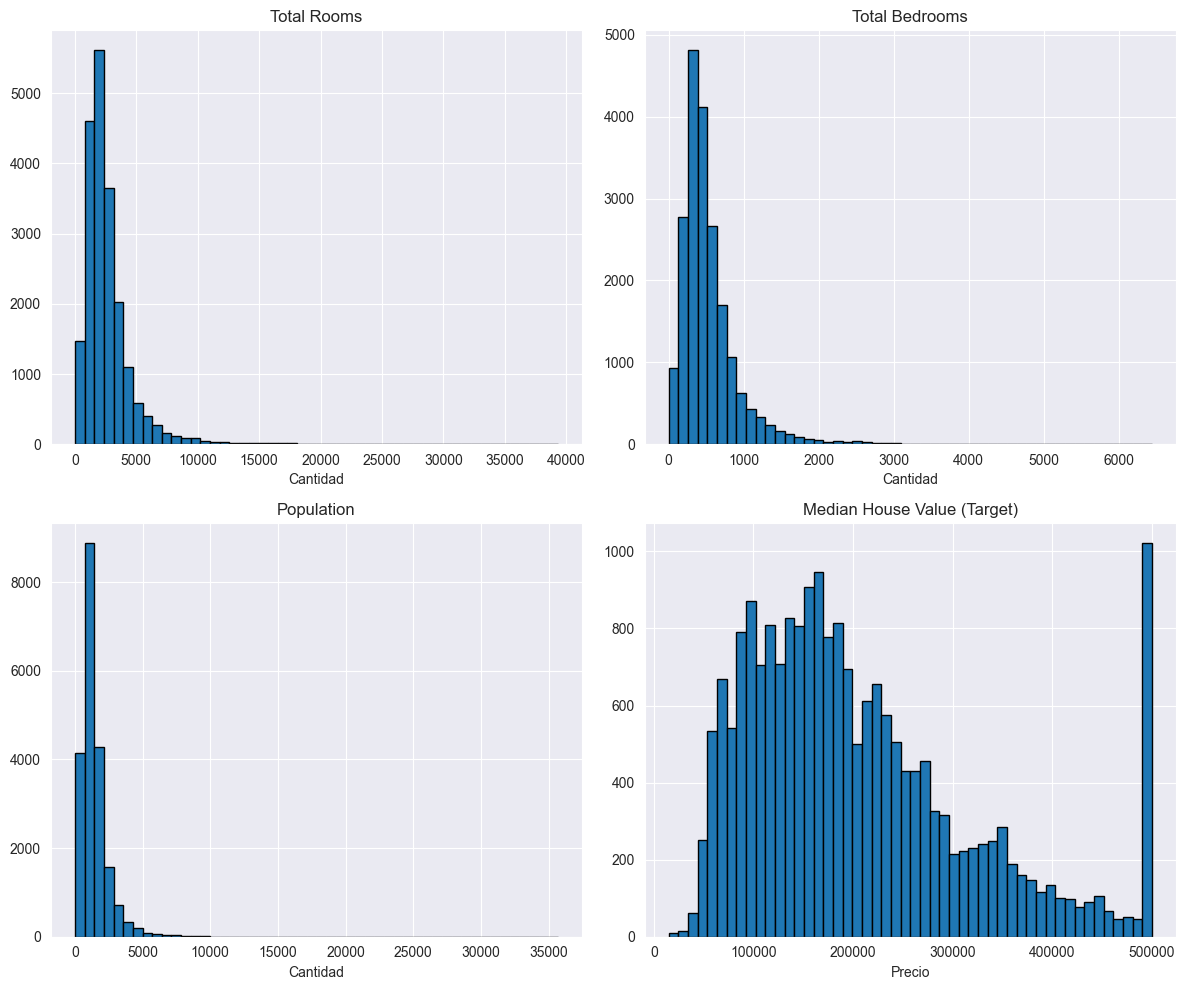

In [14]:
# Visualizar distribuciones
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].hist(df['total_rooms'], bins=50, edgecolor='black')
axes[0, 0].set_title('Total Rooms')
axes[0, 0].set_xlabel('Cantidad')

axes[0, 1].hist(df['total_bedrooms'], bins=50, edgecolor='black')
axes[0, 1].set_title('Total Bedrooms')
axes[0, 1].set_xlabel('Cantidad')

axes[1, 0].hist(df['population'], bins=50, edgecolor='black')
axes[1, 0].set_title('Population')
axes[1, 0].set_xlabel('Cantidad')

axes[1, 1].hist(df['median_house_value'], bins=50, edgecolor='black')
axes[1, 1].set_title('Median House Value (Target)')
axes[1, 1].set_xlabel('Precio')

plt.tight_layout()
plt.savefig('distribucion_variables.png')
plt.show()

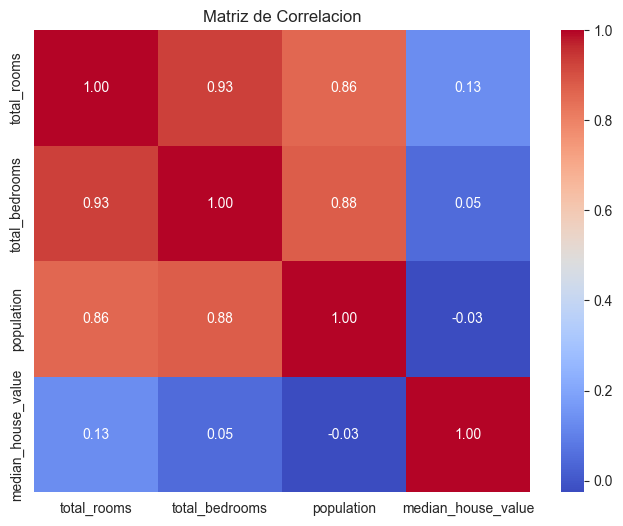


Correlacion con el precio:
median_house_value    1.000000
total_rooms           0.133294
total_bedrooms        0.049686
population           -0.025300
Name: median_house_value, dtype: float64


In [15]:
# Matriz de correlacion
datos_modelo = df[features + [target]]

plt.figure(figsize=(8, 6))
sns.heatmap(datos_modelo.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlacion')
plt.savefig('matriz_correlacion.png')
plt.show()

print("\nCorrelacion con el precio:")
print(datos_modelo.corr()[target].sort_values(ascending=False))

## 2. Cambio de Estructura a Matricial

In [16]:
X = df[features].values
y = df[target].values

print(f"Matriz X (features): {X.shape}")
print(f"Vector y (target): {y.shape}")
print(f"\nPrimeras 3 filas de X:")
print(X[:3])
print(f"\nPrimeros 3 valores de y:")
print(y[:3])

Matriz X (features): (20433, 3)
Vector y (target): (20433,)

Primeras 3 filas de X:
[[ 880.  129.  322.]
 [7099. 1106. 2401.]
 [1467.  190.  496.]]

Primeros 3 valores de y:
[452600. 358500. 352100.]


## 3. Particionado de Datos (70% train - 30% test)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Datos de entrenamiento: {X_train.shape[0]} filas ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Datos de prueba: {X_test.shape[0]} filas ({X_test.shape[0]/len(X)*100:.1f}%)")

Datos de entrenamiento: 14303 filas (70.0%)
Datos de prueba: 6130 filas (30.0%)


## 4. Generacion del Modelo con Datos de Entrenamiento

In [18]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("Modelo entrenado exitosamente")
print(f"\nCoeficientes del modelo:")
for feature, coef in zip(features, modelo.coef_):
    print(f"  {feature}: {coef:.2f}")
print(f"\nIntercepto: {modelo.intercept_:.2f}")

# Ecuacion del modelo
print(f"\nEcuacion del modelo:")
print(f"precio = {modelo.intercept_:.2f}", end="")
for feature, coef in zip(features, modelo.coef_):
    print(f" + ({coef:.2f} * {feature})", end="")
print()

Modelo entrenado exitosamente

Coeficientes del modelo:
  total_rooms: 40.84
  total_bedrooms: -82.79
  population: -41.85

Intercepto: 203843.73

Ecuacion del modelo:
precio = 203843.73 + (40.84 * total_rooms) + (-82.79 * total_bedrooms) + (-41.85 * population)


## 5. Evaluacion del Modelo con Datos de Entrenamiento

In [19]:
y_pred_train = modelo.predict(X_train)

mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("EVALUACION - ENTRENAMIENTO")
print("="*50)
print(f"MAE: ${mae_train:,.2f}")
print(f"MSE: ${mse_train:,.2f}")
print(f"R2: {r2_train:.4f}")
print(f"\nInterpretacion: El modelo explica el {r2_train*100:.2f}% de la variabilidad en entrenamiento")

EVALUACION - ENTRENAMIENTO
MAE: $85,782.43
MSE: $12,010,317,437.00
R2: 0.0984

Interpretacion: El modelo explica el 9.84% de la variabilidad en entrenamiento


## 6. Evaluacion del Modelo con Datos de Test

In [20]:
y_pred_test = modelo.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("EVALUACION - TEST")
print("="*50)
print(f"MAE: ${mae_test:,.2f}")
print(f"MSE: ${mse_test:,.2f}")
print(f"R2: {r2_test:.4f}")
print(f"\nInterpretacion: El modelo explica el {r2_test*100:.2f}% de la variabilidad en test")

EVALUACION - TEST
MAE: $86,303.01
MSE: $11,932,499,546.62
R2: 0.1049

Interpretacion: El modelo explica el 10.49% de la variabilidad en test


## Grafico Real vs Predicho

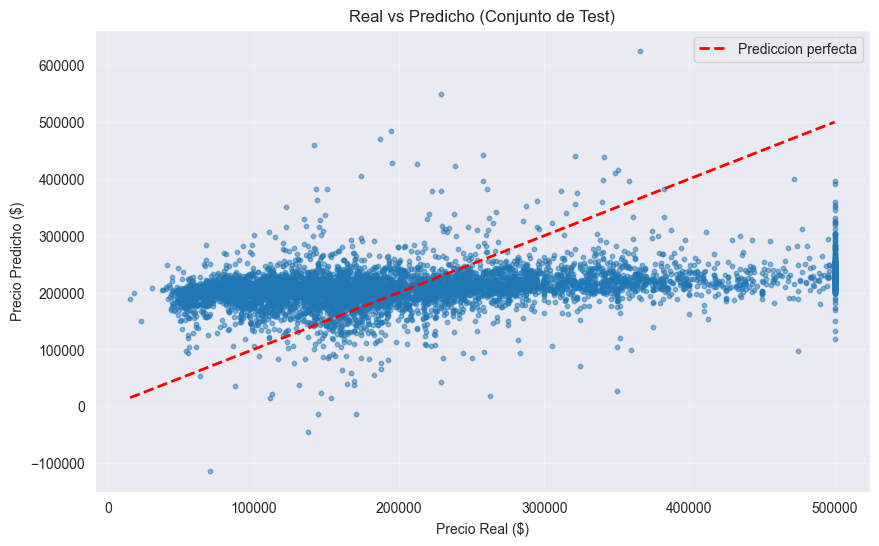

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Prediccion perfecta')
plt.xlabel('Precio Real ($)')
plt.ylabel('Precio Predicho ($)')
plt.title('Real vs Predicho (Conjunto de Test)')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('real_vs_predicho.png')
plt.show()

## Comparativa Train vs Test

In [22]:
comparacion = pd.DataFrame({
    'Metrica': ['MAE', 'MSE', 'R2'],
    'Entrenamiento': [mae_train, mse_train, r2_train],
    'Test': [mae_test, mse_test, r2_test],
    'Diferencia': [
        abs(mae_train - mae_test),
        abs(mse_train - mse_test),
        abs(r2_train - r2_test)
    ]
})

print("\nCOMPARATIVA TRAIN VS TEST")
print("="*70)
print(comparacion.to_string(index=False))
print("="*70)

diferencia_r2 = abs(r2_train - r2_test)
if diferencia_r2 < 0.05:
    print("\nConclusión: Modelo estable, no hay overfitting")
elif diferencia_r2 < 0.10:
    print("\nConclusión: Modelo aceptable, leve variación")
else:
    print("\nConclusión: Posible overfitting, revisar modelo")


COMPARATIVA TRAIN VS TEST
Metrica  Entrenamiento         Test   Diferencia
    MAE   8.578243e+04 8.630301e+04 5.205809e+02
    MSE   1.201032e+10 1.193250e+10 7.781789e+07
     R2   9.842610e-02 1.049014e-01 6.475256e-03

Conclusión: Modelo estable, no hay overfitting
